In [1]:
import re
import pandas as pd
import numpy as np
import pickle
import os
import jieba
import jieba.posseg as pseg

In [2]:
#將繁體字進行切斷

In [4]:
data_path = "./dataset_5.csv"
data = pd.read_csv(data_path, engine='python')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87253 entries, 0 to 87252
Data columns (total 5 columns):
cbodyurl      87253 non-null object
title         87253 non-null object
txtcontent    85427 non-null object
label         87253 non-null object
text          87253 non-null object
dtypes: object(5)
memory usage: 3.3+ MB


In [6]:
data.head()

,cbodyurl,title,txtcontent,label,text
0,https://inetrsc.cupoy.com/http176.34.63.351173...,近看膚質也好到像自備濾鏡！曾之喬偷懶急救居然只靠這一招 - FG彩妝保養 - Fashion...,(圖片來源/FB@曾之喬)在還沒看到曾之喬以前，真的無法相信有人的膚質可以好到這種程度，大笑...,3,在還沒看到曾之喬以前，真的無法相信有人的膚質可以好到這種程度，大笑起來沒有細紋，膚質平滑，白...
1,https://inetrsc.cupoy.com/http176.34.63.351173...,夾睫毛總是夾到眼皮？睫毛長又翹「兩段式」夾、刷法技巧大公開 - FG彩妝保養 - Fashi...,(圖片來源：Pinterest/INSTAGRAM@kerina_hsueh)每次夾睫毛總是...,3,其實夾睫毛不是一件這麼難的事，只是有些步驟常常被忽略~快跟著以下步驟，讓妳就算不用種睫毛，也...
2,https://inetrsc.cupoy.com/http24h.pchome.com.t...,PChome線上購物 -,NaN,11,但猶豫期並非試用期，請留意，您所退回的商品必須回復原狀（須回復至商品到貨時的原始狀態）並且保...
3,https://inetrsc.cupoy.com/http24h.pchome.com.t...,PChome線上購物 -,NaN,11,但猶豫期並非試用期，請留意，您所退回的商品必須回復原狀（須回復至商品到貨時的原始狀態）並且保...
4,https://inetrsc.cupoy.com/http30plus.30.com.tw...,在學賺錢之前，先學會如何管理錢 - 【30雜誌】30+BLOG,即使找到金飯碗，領死薪水是不會致富的！人人稱羨的科技新貴，跳脫舒適圈創業去！人人都想賺錢、人...,6,」這樣的觀念從小就被植入，當時的我一直很想賺錢，學生時代幾乎都會去打工，像是：KTV服務生、...


In [7]:
!pip install opencc-python-reimplemented

Processing /home/jovyan/.cache/pip/wheels/54/8a/0f/405db0ba3f02d9af8211422d3ae94c47b3296256f168ac1e68/opencc_python_reimplemented-0.1.6-py2.py3-none-any.whl


In [8]:
from opencc import OpenCC
cc = OpenCC('s2tw')

data_raw = data['text'].tolist()
new_data = []

for i in data_raw:
    i = str(i).lower()
    new_data.append(cc.convert(i))
#     print(new_data)
    

#data_raw['tw_text'] = cc.convert(data_raw['text'])

In [10]:
data_model = data.drop(['cbodyurl','title','txtcontent','text'], axis = 1)
data_model.head()

,label
0,3
1,3
2,11
3,11
4,6


In [11]:
data_model['text'] = new_data
data_model.head()

,label,text
0,3,在還沒看到曾之喬以前，真的無法相信有人的膚質可以好到這種程度，大笑起來沒有細紋，膚質平滑，白...
1,3,其實夾睫毛不是一件這麼難的事，只是有些步驟常常被忽略~快跟著以下步驟，讓妳就算不用種睫毛，也...
2,11,但猶豫期並非試用期，請留意，您所退回的商品必須回復原狀（須回復至商品到貨時的原始狀態）並且保...
3,11,但猶豫期並非試用期，請留意，您所退回的商品必須回復原狀（須回復至商品到貨時的原始狀態）並且保...
4,6,」這樣的觀念從小就被植入，當時的我一直很想賺錢，學生時代幾乎都會去打工，像是：ktv服務生、...


In [12]:
data.to_csv('dataset_8_multi.csv',index=False)

In [64]:
# data_path = "./dataset_7.csv"
# data_model = pd.read_csv(data_path, engine='python')

In [ ]:
# data_model.head()

In [13]:
#處理label
import re
import sys
label_idxs = []
label_vs = []
for index, article in data_model.iterrows():
    label_str = str(article['label'])
    label_arr = re.split(r'\t+', label_str)
    label_arr = [int(l) for l in label_arr]
    label_idxs.append(index)
    
    v = np.zeros(14).astype('int32')
    for li in label_arr:
        v[li] = 1
    label_vs.append(v)

In [14]:
column_list = range(14)

pre_res = ["cat_" + str(sub) for sub in column_list]


res = pd.DataFrame (label_vs,columns=pre_res)
res

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,0,0,0,0,0,0,0,0,0,1,0,0,0,0
87249,0,0,0,0,0,0,0,0,0,1,0,0,0,0
87250,0,0,0,0,0,0,0,0,0,1,0,0,0,0
87251,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
# train, test = train_test_split(data_model, test_size=0.3, random_state=86)

In [16]:
train_label = res

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(data_model,train_label, test_size=0.2, random_state=86, shuffle=True)

In [18]:
X_train.shape

(69802, 2)

In [19]:
X_test.shape

(17451, 2)

In [42]:
stop_path = './jieba/stop_words2.txt'

In [43]:
def preprocess_sentences(data, colname):
    sentences = []
    data0 = data[colname].tolist()
    stop_words = open(stop_path).read().splitlines()
    for i, text in enumerate(data0):
        line = []
        text = str(text)
        for w in jieba.cut(text, cut_all=False):

            # remove stopwords and digits
            # can define your own rules
            if w not in stop_words and not bool(re.match('[0-9\n●「」\r\n -/`【】]+', w)):
                line.append(w)

        sentences.append(line)

        if i%10000==0:
            print(i, '/', len(data))
    return sentences

In [44]:
X_train_sen = preprocess_sentences(X_train, 'text')

Building prefix dict from the default dictionary ...
2020-08-28 21:17:31,923: DEBUG: Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
2020-08-28 21:17:32,920: DEBUG: Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.098 seconds.
2020-08-28 21:17:33,022: DEBUG: Loading model cost 1.098 seconds.
Prefix dict has been built succesfully.
2020-08-28 21:17:33,023: DEBUG: Prefix dict has been built succesfully.


0 / 69802
10000 / 69802
20000 / 69802
30000 / 69802
40000 / 69802
50000 / 69802
60000 / 69802


In [45]:
X_test_sen = preprocess_sentences(X_test, 'text')

0 / 17451
10000 / 17451


In [46]:
# save data as pickle format
with open("storeSpace/cupoy_cutted_X_train_multi", "wb") as file:
    pickle.dump(X_train_sen, file)

In [47]:
# save data as pickle format
with open("storeSpace/cupoy_cutted_X_test_multi", "wb") as file:
    pickle.dump(X_test_sen, file)

In [ ]:
#Word2Vec

In [48]:
import pickle
from gensim.models import word2vec
import random
import logging
import os


In [49]:
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

In [50]:
## load 'article_cutted'
with open('storeSpace/cupoy_cutted_X_train_multi', 'rb') as file:
    cupoy_cutted_X_train = pickle.load(file)

In [51]:
## load 'article_cutted'
with open('storeSpace/cupoy_cutted_X_test_multi', 'rb') as file:
    cupoy_cutted_X_test = pickle.load(file)

In [ ]:
#Averaging Word Embedding for Each Doc

In [53]:
import pickle
from gensim.models import Doc2Vec, doc2vec
from gensim.models import word2vec
from gensim.models import KeyedVectors
import gensim
import random
import numpy as np
import logging
import os

In [54]:
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

In [55]:
# load 'article_cutted'
with open('storeSpace/cupoy_cutted_X_train_multi', 'rb') as file:
    cupoy_cutted_X_train = pickle.load(file)

In [56]:
with open('storeSpace/cupoy_cutted_X_test_multi', 'rb') as file:
    cupoy_cutted_X_test = pickle.load(file)

In [57]:
load_wiki = KeyedVectors.load_word2vec_format('word2vec_model/zh_wiki_word2vec_300.txt')

2020-08-28 21:33:32,895: INFO: loading projection weights from word2vec_model/zh_wiki_word2vec_300.txt
2020-08-28 21:38:17,856: INFO: loaded (614083, 300) matrix from word2vec_model/zh_wiki_word2vec_300.txt


In [58]:
load_wiki.most_similar(positive=['英文'])

2020-08-28 21:38:18,082: INFO: precomputing L2-norms of word weight vectors


[('中文', 0.7536253929138184),
 ('法文', 0.6874601244926453),
 ('日文', 0.6220279932022095),
 ('西班牙文', 0.6084370613098145),
 ('韓文', 0.5994431972503662),
 ('德文', 0.5884890556335449),
 ('俄文', 0.5821559429168701),
 ('譯名', 0.5794787406921387),
 ('芬蘭文', 0.5641646981239319),
 ('英文名', 0.5599370002746582)]

In [ ]:
# from wikipedia2vec import Wikipedia2Vec
# wiki2vec = Wikipedia2Vec.load(MODEL_FILE)

參考文獻：
用維基語料訓練 Word2vec 和 FastText embedding
https://medium.com/@black_swan/%E7%94%A8%E7%B6%AD%E5%9F%BA%E8%AA%9E%E6%96%99%E8%A8%93%E7%B7%B4-word2vec-%E5%92%8C-fasttext-embedding-25ede5b15994
Gensim:
https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec.load
Pretrained Embeddings
https://wikipedia2vec.github.io/wikipedia2vec/pretrained/



In [59]:
# filter words that not in word2vec's vocab
train_data_filtered = [[w for w in l if w in load_wiki.wv] for l in cupoy_cutted_X_train]
test_data_filtered = [[w for w in l if w in load_wiki.wv] for l in cupoy_cutted_X_test]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# compute average word vector
def avg_vec(data_filtered,model):
    avg_vector = []

    for l in data_filtered:
        if len(l)==0:
            avg_vector.append(np.array([0]*300))
        else:
            avg_vector.append(np.mean([model.wv[w] for w in l], axis=0))
    return avg_vector

In [61]:
train_avg_vec = avg_vec(train_data_filtered, load_wiki)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [62]:
test_avg_vec = avg_vec(test_data_filtered, load_wiki)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [63]:
# save result
with open('storeSpace/train_avg_vec_byWiki_multi', 'wb') as file:
    pickle.dump(train_avg_vec, file)

In [64]:
# save result
with open('storeSpace/test_avg_vec_byWiki_multi', 'wb') as file:
    pickle.dump(test_avg_vec, file)

In [65]:
train_avg_df = pd.DataFrame(train_avg_vec)

In [66]:
test_avg_df = pd.DataFrame(test_avg_vec)

In [67]:
column_list = range(300)
col_name = ["char_" + str(sub) for sub in column_list]

In [68]:
train_avg_df.columns = col_name
test_avg_df.columns = col_name

In [69]:
train_avg_df

,char_0,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,char_290,char_291,char_292,char_293,char_294,char_295,char_296,char_297,char_298,char_299
0,-0.008425,0.129156,-0.093522,-0.048951,-0.058888,0.052714,-0.004987,0.028211,-0.019855,0.033170,...,0.023727,0.012374,0.029403,0.023513,0.012715,0.028415,-0.004311,-0.061172,0.015566,0.079598
1,-0.027754,0.273532,-0.131908,0.023451,-0.020649,0.009764,-0.139221,-0.008427,0.055484,0.105191,...,0.055717,-0.012941,0.148655,0.069807,0.046016,0.002905,0.155340,-0.010253,0.003935,0.037889
2,0.009052,0.222384,-0.146011,-0.035718,0.064570,0.002945,-0.066334,0.036905,0.049532,0.087042,...,-0.003045,0.096498,0.013862,0.100853,0.052456,0.074452,0.146352,-0.085539,0.143163,0.096568
3,-0.056414,0.155171,-0.084697,-0.039708,-0.035160,-0.021497,0.002137,-0.014812,0.008707,0.006339,...,-0.032587,-0.004272,0.115898,0.004656,0.020248,0.006217,0.046302,-0.115650,0.049049,0.076631
4,-0.073609,0.137007,0.041904,0.000874,-0.131686,-0.050684,-0.014359,-0.068699,0.041054,0.043168,...,-0.062633,-0.011070,0.027401,0.128638,0.015332,0.072530,0.057738,-0.086273,0.062275,0.111539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69797,-0.079424,0.215497,-0.268249,0.007372,0.059569,0.039220,-0.055396,0.099405,0.006263,0.067548,...,-0.011309,0.036183,0.143516,0.016231,-0.031993,-0.011667,0.057867,-0.086628,0.065365,0.092180
69798,-0.075651,0.094129,-0.067812,-0.061015,-0.051484,0.038884,0.038729,-0.040693,0.043736,0.019412,...,-0.055765,-0.039198,0.042518,0.049137,0.018347,0.013304,0.020468,-0.041109,0.058176,0.134234
69799,-0.115798,0.189084,-0.097975,-0.023056,-0.004818,-0.039933,-0.005087,-0.018984,-0.052573,0.002800,...,-0.044733,0.026812,0.094157,0.063642,0.052534,0.020422,-0.018134,-0.117402,0.031489,0.115265
69800,-0.037045,0.230320,-0.045102,-0.027418,0.013853,-0.027821,-0.153875,-0.069017,0.078570,0.086857,...,0.027517,0.048143,0.138425,0.145676,0.096463,0.115789,0.064161,-0.120399,0.123255,0.023947


In [ ]:
#訓練模型前記得切資料

In [38]:
X_train.shape

(69802, 2)

In [40]:
X_test.shape

(17451, 2)

In [ ]:
#模型訓練

In [70]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

In [71]:
Y_train.shape

(69802, 14)

In [72]:
Y_trainarray = Y_train.to_numpy()
Y_trainarray

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [73]:
clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1,learning_rate=0.2, max_depth=6))

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
# mlb = MultiLabelBinarizer()
# Y_train = mlb.fit_transform(Y_train)

clf.fit(train_avg_df, Y_trainarray)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.2, max_delta_step=0,
                                            max_depth=6, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=-1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1),
                    n_jobs=None)

參考文獻：

Multiclass & Multilabel Classification with XGBoost
https://medium.com/@gabrielziegler3/multiclass-multilabel-classification-with-xgboost-66195e4d9f2d
使用 scikit-learn 實現多類別及多標籤分類算法
https://www.cnblogs.com/Allen-rg/p/9492303.html

In [94]:
y_pred = clf.predict_proba(test_avg_df)
y_pred[:5]

array([[8.6409721e-04, 2.7521725e-03, 1.9732982e-02, 1.3769448e-03,
        1.5181741e-03, 1.4332428e-03, 1.3464069e-02, 5.4734158e-03,
        3.7756745e-02, 3.7401470e-03, 3.0757235e-03, 9.5337552e-01,
        1.0322124e-03, 4.1506585e-04],
       [1.7942904e-02, 2.2108918e-02, 1.4849161e-03, 1.1774186e-03,
        1.7511967e-03, 1.5411386e-03, 6.9226222e-03, 8.3686580e-04,
        3.8794244e-03, 1.8702184e-03, 2.8696892e-01, 1.3300987e-01,
        3.8875202e-03, 2.5876777e-03],
       [1.0394804e-03, 3.1379338e-03, 9.6143466e-01, 8.0926931e-03,
        9.8598620e-04, 3.7296964e-03, 4.1663293e-03, 1.2421773e-02,
        2.2071624e-02, 1.1783838e-02, 4.4088561e-02, 5.8406912e-02,
        1.5685010e-03, 2.9990929e-03],
       [8.5303354e-01, 2.5054991e-02, 3.1581109e-03, 1.3712287e-03,
        5.8490094e-03, 4.3566176e-03, 7.4560352e-02, 2.2988229e-03,
        1.4281617e-01, 1.3980184e-03, 1.7577032e-02, 1.2019140e-02,
        8.0806558e-04, 2.3207511e-03],
       [2.1070715e-03, 8.140

In [74]:
y_class = clf.predict(test_avg_df)
y_class[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [75]:
Y_test[:5]

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13
81803,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5028,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19191,0,0,1,0,0,0,0,0,0,0,0,0,0,0
54152,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8715,1,0,0,0,0,0,0,0,0,0,1,0,1,0


Accuracy: 67.09%


([array([16687.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,   764.]),
  array([15557.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  1894.]),
  array([15564.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  1887.]),
  array([16529.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,   922.]),
  array([15529.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  1922.]),
  array([15406.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  2045.]),
  array([16370.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  1081.]),
  array([16794.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,   657.]),
  array([16068.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  1383.]),
  array([15422.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  2029.]),


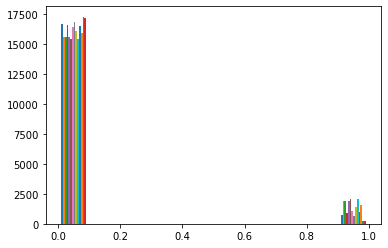

In [77]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
y_pred = clf.predict(test_avg_df)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plt.hist(y_pred)

In [78]:
from sklearn.metrics import hamming_loss
hamming_loss(Y_test, y_pred)

0.03091922689653479